In [12]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
#from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering #병합군집
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import collections
#import mglearn
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings(action='ignore') 

random.seed(2023)

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [14]:
df = pd.read_csv('/Users/dajungoh/기계학습/data/Chemical Composion of Ceramic.csv')
df.head()

,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,FLQ-1-b,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,FLQ-2-b,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,FLQ-3-b,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,FLQ-4-b,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,FLQ-5-b,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ceramic Name  88 non-null     object 
 1   Part          88 non-null     object 
 2   Na2O          88 non-null     float64
 3   MgO           88 non-null     float64
 4   Al2O3         88 non-null     float64
 5   SiO2          88 non-null     float64
 6   K2O           88 non-null     float64
 7   CaO           88 non-null     float64
 8   TiO2          88 non-null     float64
 9   Fe2O3         88 non-null     float64
 10  MnO           88 non-null     int64  
 11  CuO           88 non-null     int64  
 12  ZnO           88 non-null     int64  
 13  PbO2          88 non-null     int64  
 14  Rb2O          88 non-null     int64  
 15  SrO           88 non-null     int64  
 16  Y2O3          88 non-null     int64  
 17  ZrO2          88 non-null     int64  
 18  P2O5          88 non-null     in

In [16]:
df.drop('Ceramic Name',axis=1,inplace=True)

In [17]:
df['Part'].unique()

array(['Body', 'Glaze'], dtype=object)

In [18]:
df['Part'] = df['Part'].apply(lambda x:0 if x=='Body' else 1)

In [19]:
df.isnull().any().any()

False

In [20]:
y = df['Part']
X = df.drop('Part', axis=1)

In [21]:
from sklearn.preprocessing import RobustScaler 

rbs = RobustScaler()
X_rbs = rbs.fit_transform(X)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [23]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()
X_norm = norm.fit_transform(X)

# 1. K-Means Clustering

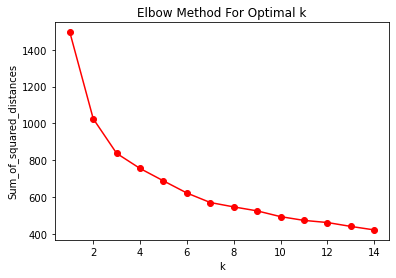

In [24]:
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(X_sc)
    sum_of_squared_distances.append(km.inertia_)
   
# 시각화
plt.plot(K, sum_of_squared_distances, 'ro-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


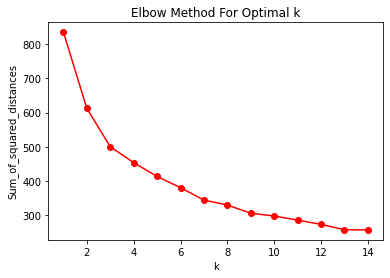

In [25]:
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(X_rbs)
    sum_of_squared_distances.append(km.inertia_)
   
# 시각화
plt.plot(K, sum_of_squared_distances, 'ro-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

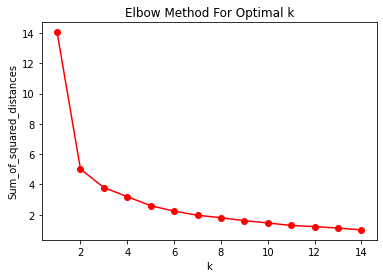

In [26]:
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(X_norm)
    sum_of_squared_distances.append(km.inertia_)
   
# 시각화
plt.plot(K, sum_of_squared_distances, 'ro-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


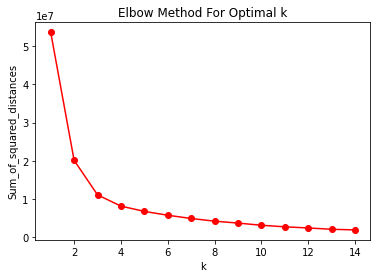

In [27]:
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
   
# 시각화
plt.plot(K, sum_of_squared_distances, 'ro-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [28]:
from sklearn import cluster

k_Means = cluster.KMeans(init='k-means++', n_clusters=2, n_init=10, random_state=2023)
k_Means.fit(X_sc)
sc_cluster_label = k_Means.labels_
print(sc_cluster_label, end='\n')
sc_Score = np.round(silhouette_score(X_sc, sc_cluster_label), 2)
print(sc_Score)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.29


In [29]:
from sklearn import cluster

k_Means = cluster.KMeans(init='k-means++', n_clusters=2, n_init=10, random_state=2023)
k_Means.fit(X_rbs)
rbs_cluster_label = k_Means.labels_
print(rbs_cluster_label, end='\n')
Score = np.round(silhouette_score(X_sc, rbs_cluster_label), 2)
print(Score)

[0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.27


In [30]:
from sklearn import cluster

k_Means = cluster.KMeans(init='k-means++', n_clusters=2, n_init=100, random_state=2023)
k_Means.fit(X_norm)
norm_cluster_label = k_Means.labels_
print(norm_cluster_label, end='\n')
norm_ss = np.round(silhouette_score(X_norm, norm_cluster_label), 2)
print("Silhouette 계수 :", norm_ss)

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Silhouette 계수 : 0.56


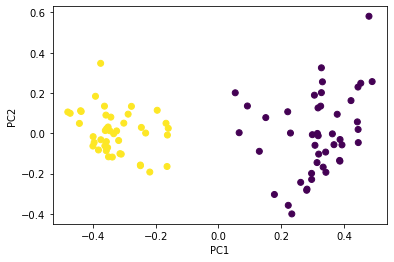

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=2023)
norm_X_pca = pca.fit_transform(X_norm)

plt.scatter(norm_X_pca[:, 0], norm_X_pca[:, 1], c=norm_cluster_label)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

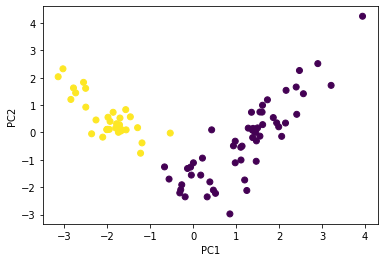

In [32]:
pca = PCA(n_components=2, random_state=2023)
rbs_X_pca = pca.fit_transform(X_rbs)

plt.scatter(rbs_X_pca[:, 0], rbs_X_pca[:, 1], c=rbs_cluster_label)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

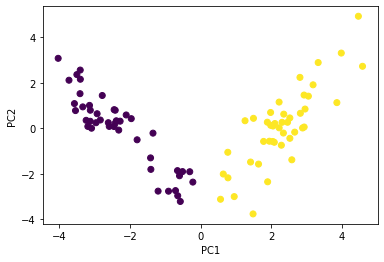

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=2023)
sc_X_pca = pca.fit_transform(X_sc)

plt.scatter(sc_X_pca[:, 0], sc_X_pca[:, 1], c=sc_cluster_label)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

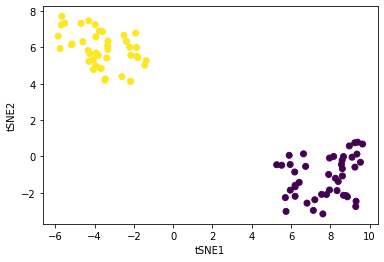

In [34]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=2023)
norm_X_tsne = tsne.fit_transform(X_norm)

plt.scatter(norm_X_tsne[:, 0], norm_X_tsne[:, 1], c=norm_cluster_label)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.show()

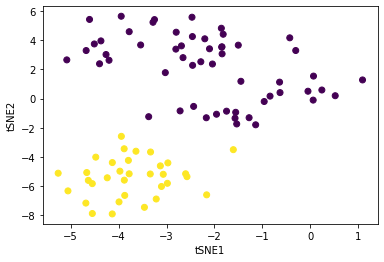

In [35]:
tsne = TSNE(n_components=2, random_state=2023)
rbs_X_tsne = tsne.fit_transform(X_rbs)

plt.scatter(rbs_X_tsne[:, 0], rbs_X_tsne[:, 1], c=rbs_cluster_label)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.show()

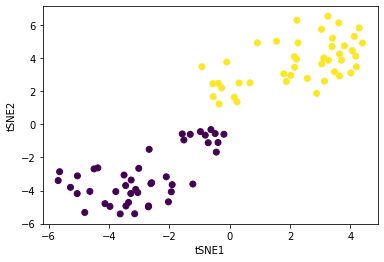

In [36]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=2023)
sc_X_tsne = tsne.fit_transform(X_sc)

plt.scatter(sc_X_tsne[:, 0], sc_X_tsne[:, 1], c=sc_cluster_label)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.show()

In [37]:
# Calinski-Harabasz Index: 클러스터 내의 분산과 클러스터 간의 분산 비율을 측정한 값임. 클러스터가 더 잘 구분되어있을수록 값이 커짐
from sklearn.metrics import calinski_harabasz_score
norm_ch_score = calinski_harabasz_score(X_norm, norm_cluster_label)
sc_ch_score = calinski_harabasz_score(X_sc, sc_cluster_label)
print("normalize 데이터 :", norm_ch_score)
print("standardscaler 데이터 :", sc_ch_score)

normalize 데이터 : 155.00142084881887
standardscaler 데이터 : 39.486299474289815


In [38]:
# V-measure: homogeneity와 completeness의 조화 평균을 측정한 값임. 범위는 0 ~ 1이며, 1에 가까울수록 군집화가 잘 된 것
from sklearn.metrics import v_measure_score
norm_v_measure_score = v_measure_score(y, norm_cluster_label)
sc_v_measure_score = v_measure_score(y, sc_cluster_label)
print("normalize 데이터 :", norm_v_measure_score)
print("standardscaler 데이터 :", sc_v_measure_score)

normalize 데이터 : 0.921553538364857
standardscaler 데이터 : 1.0


In [39]:
# Adjusted Rand Index (ARI): 클러스터링 결과와 실제 라벨 값 사이의 일치 정도를 측정한 값임. 범위는 -1 ~ 1이며, 1에 가까울수록 일치도가 높음.
from sklearn.metrics import adjusted_rand_score
norm_ari_score = adjusted_rand_score(y, norm_cluster_label)
sc_ari_score = adjusted_rand_score(y, sc_cluster_label)
print("normalize 데이터 :", norm_ari_score)
print("standardscaler 데이터 :", sc_ari_score)

normalize 데이터 : 0.9545397214364223
standardscaler 데이터 : 1.0


In [42]:
# Normalized Mutual Information (NMI): 클러스터링 결과와 실제 라벨 값 사이의 상호 정보량을 측정한 값임.
# 범위는 0 ~ 1이며, 1에 가까울수록 일치도가 높음.
from sklearn.metrics import normalized_mutual_info_score
norm_nmi_score = normalized_mutual_info_score(y, norm_cluster_label)
sc_nmi_score = normalized_mutual_info_score(y, sc_cluster_label)
print("normalize 데이터 :", norm_nmi_score)
print("standardscaler 데이터 :", sc_nmi_score)

normalize 데이터 : 0.9215535383648571
standardscaler 데이터 : 1.0


In [43]:
# Homogeneity: 군집화 결과에서 같은 실제 클래스의 샘플이 같은 클러스터에 속하는 정도를 측정한 값임.
# 범위는 0 ~ 1이며, 1에 가까울수록 군집화가 잘 된 것.
from sklearn.metrics import homogeneity_score
norm_homogeneity_score = homogeneity_score(y, norm_cluster_label)
sc_homogeneity_score = homogeneity_score(y, sc_cluster_label)
print("normalize 데이터 :", norm_homogeneity_score)
print("standardscaler 데이터 :", sc_homogeneity_score)

normalize 데이터 : 0.9213818396046101
standardscaler 데이터 : 1.0


In [44]:
# Completeness: 같은 클러스터에 속한 샘플이 같은 실제 클래스에 속하는 정도를 측정한 값.
# 범위는 0 ~ 1이며, 1에 가까울수록 군집화가 잘 된 것.
from sklearn.metrics import completeness_score
norm_completeness_score = completeness_score(y, norm_cluster_label)
sc_completeness_score = completeness_score(y, sc_cluster_label)
print("normalize 데이터 :", norm_completeness_score)
print("standardscaler 데이터 :", sc_completeness_score)

normalize 데이터 : 0.9217253011288812
standardscaler 데이터 : 1.0


### - 실제 레이블 분포

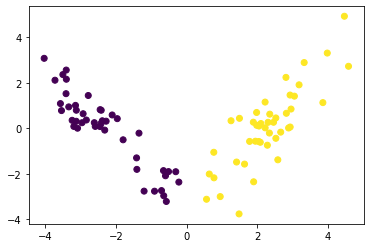

In [45]:
# 실제 레이블(y) 분포 시각화
pca_2d = make_pipeline(StandardScaler(),PCA(n_components=2, random_state=2023))
pca_2d.fit(X, y)
X_pca_2d = pca_2d.transform(X)

plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y)
plt.show()

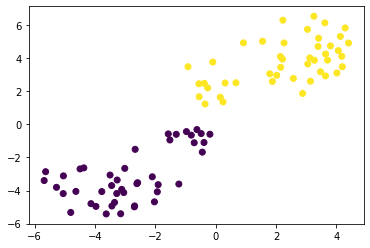

In [46]:
tsne = make_pipeline(StandardScaler(), TSNE(n_components=2, init='pca', random_state=2023))
X_tsne_2d = tsne.fit_transform(X)

plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=y)
plt.show()

# 2. DBSCAN

In [47]:
dbs = cluster.DBSCAN(eps=0.22, min_samples=5)
dbs.fit(X_norm)
norm_dbs_cluster_label = dbs.labels_

norm_dbs_noise = list(norm_dbs_cluster_label).count(-1)
print("노이즈 포인트 개수:", norm_dbs_noise)

norm_dbs_ss = np.round(silhouette_score(X_norm, norm_dbs_cluster_label), 2)
print("Silhouette 계수: ", norm_dbs_ss)

norm_dbs_vm = np.round(v_measure_score(y, norm_dbs_cluster_label),2)
print('V-measure: ', norm_dbs_vm)

norm_dbs_ari_score = np.round(adjusted_rand_score(y, norm_dbs_cluster_label),2)
print("ARI:", norm_dbs_ari_score)

norm_dbs_completeness_score = np.round(completeness_score(y, norm_dbs_cluster_label),2)
print("Completeness:", norm_dbs_completeness_score)

노이즈 포인트 개수: 3
Silhouette 계수:  0.52
V-measure:  0.82
ARI: 0.89
Completeness: 0.75


In [48]:
dbs = cluster.DBSCAN(eps=3.9, min_samples=19)
dbs.fit(X_sc)
sc_dbs_cluster_label = dbs.labels_

n_noise = list(sc_dbs_cluster_label).count(-1)
print("노이즈 포인트 개수:", n_noise)

sc_dbs_ss = np.round(silhouette_score(X_sc, sc_dbs_cluster_label), 2)
print("Silhouette 계수: ", sc_dbs_ss)

sc_dbs_vm = np.round(v_measure_score(y, sc_dbs_cluster_label),2)
print('V-measure: ', sc_dbs_vm)

sc_dbs_ari_score = np.round(adjusted_rand_score(y, sc_dbs_cluster_label))
print("ARI:", sc_dbs_ari_score)

sc_dbs_completeness_score = np.round(completeness_score(y, sc_dbs_cluster_label))
print("Completeness:", sc_dbs_completeness_score)

노이즈 포인트 개수: 7
Silhouette 계수:  0.25
V-measure:  0.69
ARI: 1.0
Completeness: 1.0


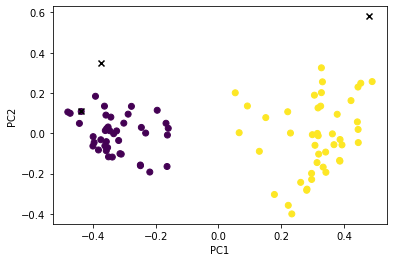

In [49]:
pca = PCA(n_components=2, random_state=2023)
norm_dbs_X_pca = pca.fit_transform(X_norm)

# 노이즈가 아닌 점
plt.scatter(norm_dbs_X_pca[norm_dbs_cluster_label != -1, 0], 
            norm_dbs_X_pca[norm_dbs_cluster_label != -1, 1], 
            c=norm_dbs_cluster_label[norm_dbs_cluster_label != -1])
# 노이즈 마커 모양을 'x'로 지정
plt.scatter(norm_dbs_X_pca[norm_dbs_cluster_label == -1, 0], 
            norm_dbs_X_pca[norm_dbs_cluster_label == -1, 1], 
            marker='x',
            c='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

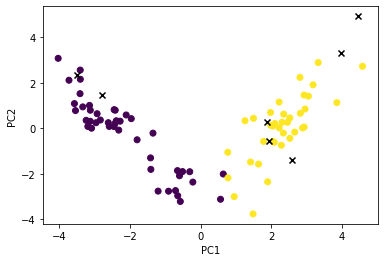

In [50]:
pca = PCA(n_components=2, random_state=2023)
sc_dbs_X_pca = pca.fit_transform(X_sc)

# 노이즈가 아닌 점
plt.scatter(sc_dbs_X_pca[sc_dbs_cluster_label != -1, 0], 
            sc_dbs_X_pca[sc_dbs_cluster_label != -1, 1], 
            c=sc_dbs_cluster_label[sc_dbs_cluster_label != -1])
# 노이즈 마커 모양을 'x'로 지정
plt.scatter(sc_dbs_X_pca[sc_dbs_cluster_label == -1, 0], 
            sc_dbs_X_pca[sc_dbs_cluster_label == -1, 1], 
            marker='x',
            c='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# 3. 계층적 군집화

Silhouette 계수:  0.27
V-measure:  0.56
ARI: 0.56
Completeness: 0.57


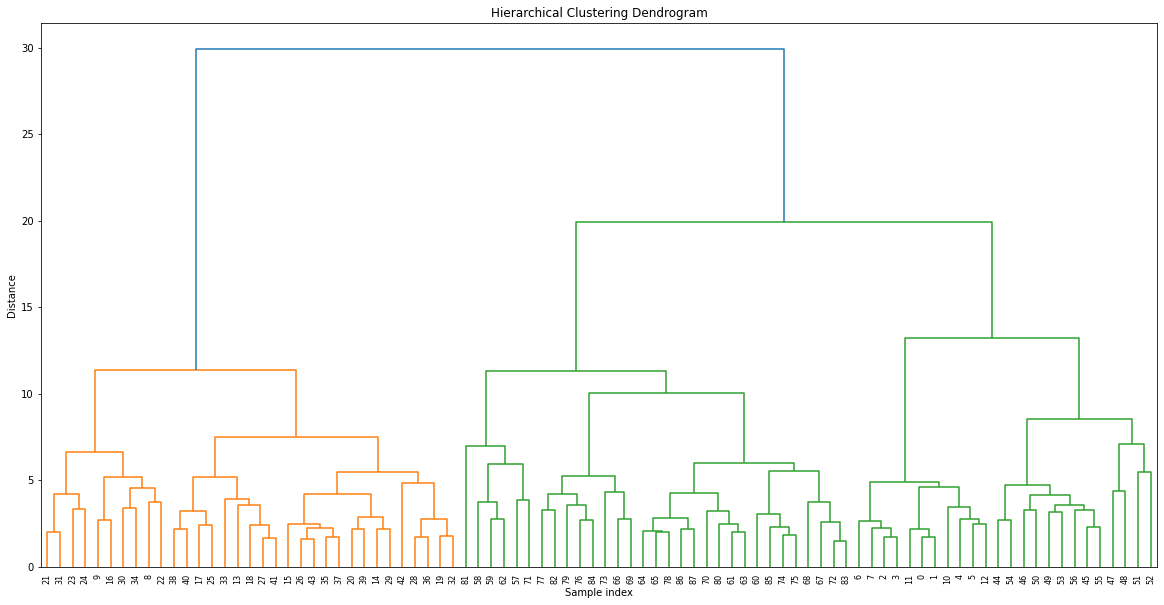

In [51]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
sc_agg_pred = agg.fit_predict(X_sc)

sc_agg_dend = linkage(X_sc, method='ward', metric='euclidean')

sc_agg_ss = np.round(silhouette_score(X_sc, sc_agg_pred), 2)
print("Silhouette 계수: ", sc_agg_ss)

sc_agg_vm = np.round(v_measure_score(y, sc_agg_pred),2)
print('V-measure: ', sc_agg_vm)

sc_agg_ari_score = np.round(adjusted_rand_score(y, sc_agg_pred),2)
print("ARI:", sc_agg_ari_score)

sc_agg_completeness_score = np.round(completeness_score(y, sc_agg_pred),2)
print("Completeness:", sc_agg_completeness_score)

# dendrogram 그리기
plt.figure(figsize=(20, 10))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
dendrogram(sc_agg_dend, leaf_rotation=90., leaf_font_size=8.)
plt.show()


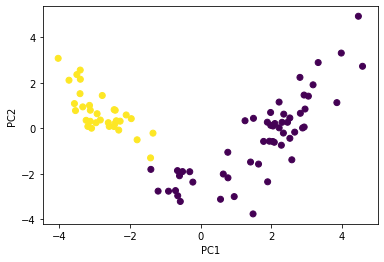

In [52]:
pca = PCA(n_components=2, random_state=2023)
sc_agg_X_pca = pca.fit_transform(X_sc)

plt.scatter(sc_agg_X_pca[:, 0], sc_agg_X_pca[:, 1], c=sc_agg_pred)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Silhouette 계수:  0.22
V-measure:  0.73
ARI: 0.66
Completeness: 0.57


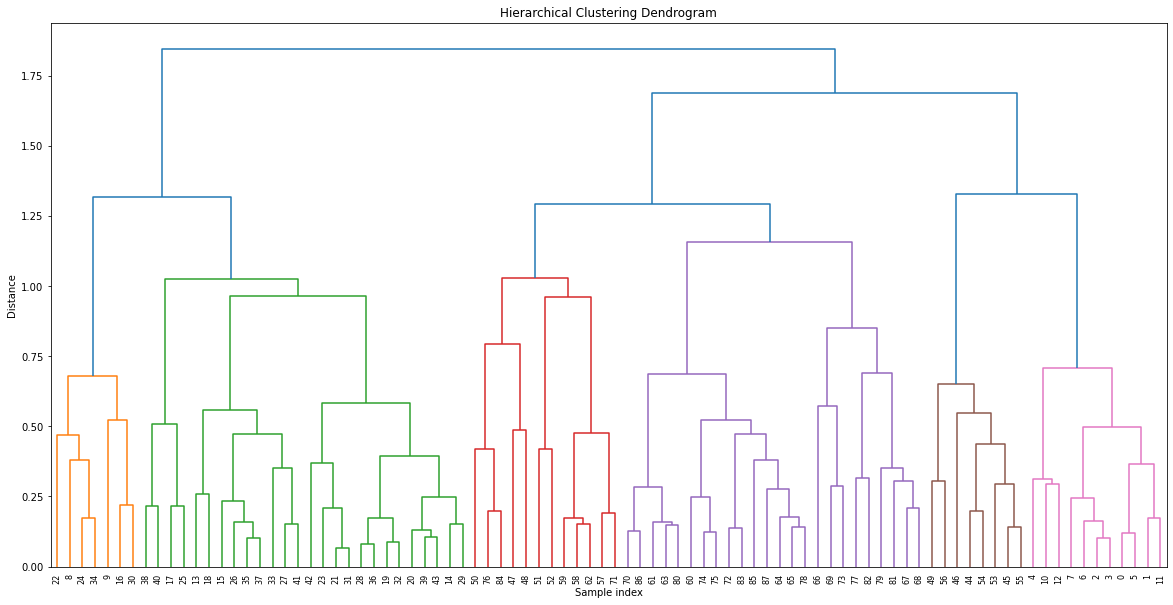

In [53]:
agg = AgglomerativeClustering(n_clusters=4, affinity='cosine', linkage='complete')
sc_agg_pred = agg.fit_predict(X_sc)
sc_agg_dend = linkage(X_sc, method='complete', metric='cosine')

sc_agg_ss = np.round(silhouette_score(X_sc, sc_agg_pred), 2)
print("Silhouette 계수: ", sc_agg_ss)

sc_agg_vm = np.round(v_measure_score(y, sc_agg_pred),2)
print('V-measure: ', sc_agg_vm)

sc_agg_ari_score = np.round(adjusted_rand_score(y, sc_agg_pred),2)
print("ARI:", sc_agg_ari_score)

sc_agg_completeness_score = np.round(completeness_score(y, sc_agg_pred),2)
print("Completeness:", sc_agg_completeness_score)

# dendrogram 그리기
plt.figure(figsize=(20, 10))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
dendrogram(sc_agg_dend, leaf_rotation=90., leaf_font_size=8.)
plt.show()

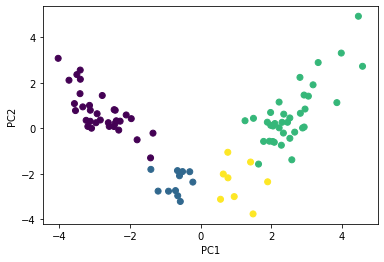

In [54]:
pca = PCA(n_components=2, random_state=2023)
sc_agg_X_pca = pca.fit_transform(X_sc)

plt.scatter(sc_agg_X_pca[:, 0], sc_agg_X_pca[:, 1], c=sc_agg_pred)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Silhouette 계수:  0.37
V-measure:  0.02
Ari : 0.0
Completeness: 0.0


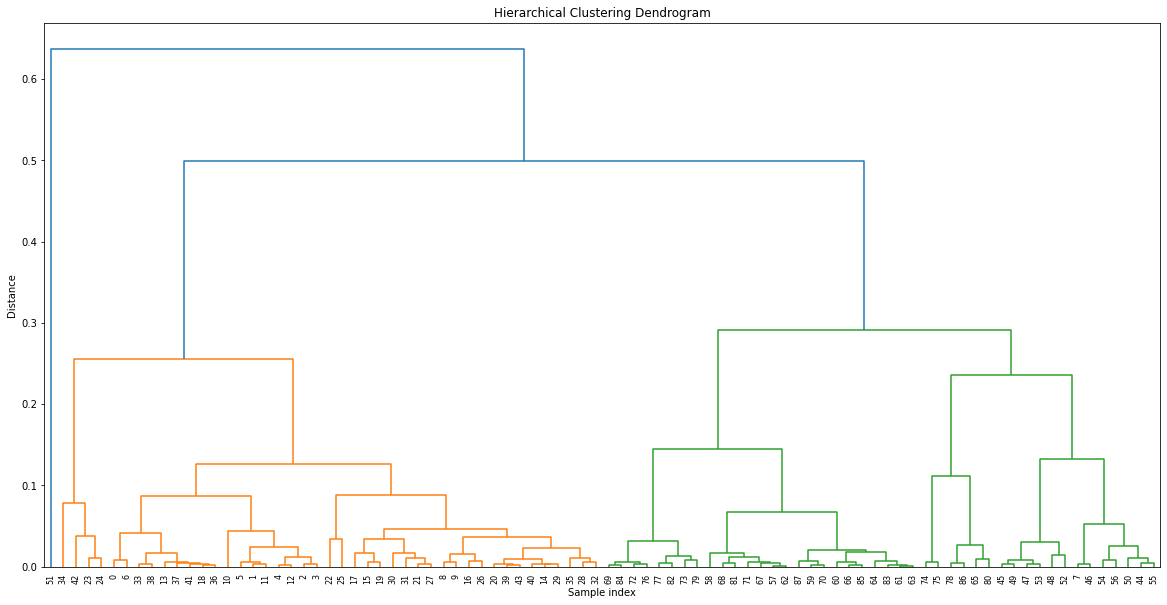

In [55]:
agg = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')
norm_agg_pred = agg.fit_predict(X_norm)
norm_agg_dend = linkage(X_norm, method='complete', metric='cosine')

norm_agg_ss = np.round(silhouette_score(X_norm, norm_agg_pred), 2)
print("Silhouette 계수: ", norm_agg_ss)

norm_agg_vm = np.round(v_measure_score(y, norm_agg_pred),2)
print('V-measure: ', norm_agg_vm)

norm_agg_ari_score = np.round(adjusted_rand_score(y, norm_agg_pred),2)
print("Ari :", norm_agg_ari_score)

norm_agg_completeness_score = np.round(completeness_score(y, norm_agg_pred))
print("Completeness:", norm_agg_completeness_score)

# dendrogram 그리기
plt.figure(figsize=(20, 10))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
dendrogram(norm_agg_dend, leaf_rotation=90., leaf_font_size=8.)
plt.show()

Silhouette 계수:  0.56
V-measure:  0.92
ARI: 0.95
Completeness: 1.0


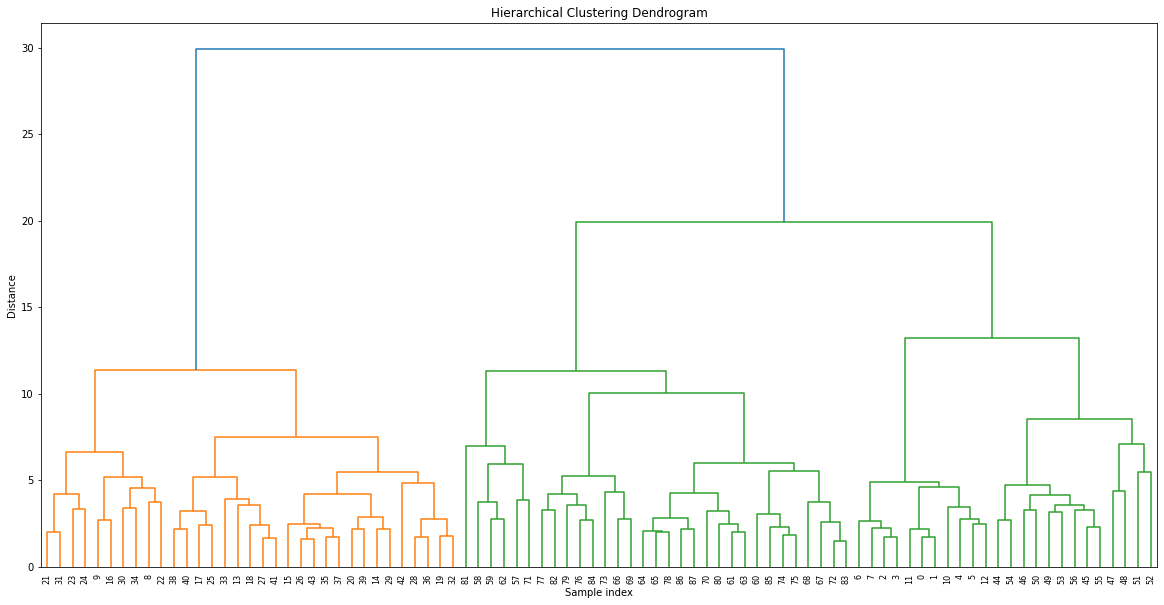

In [56]:
agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
norm_agg_pred = agg.fit_predict(X_norm)

norm_agg_dend = linkage(X_sc, method='ward', metric='euclidean')

norm_agg_ss = np.round(silhouette_score(X_norm, norm_agg_pred), 2)
print("Silhouette 계수: ", norm_agg_ss)

norm_agg_vm = np.round(v_measure_score(y, norm_agg_pred),2)
print('V-measure: ', norm_agg_vm)

norm_agg_ari_score = np.round(adjusted_rand_score(y, norm_agg_pred),2)
print("ARI:", norm_agg_ari_score)

norm_agg_completeness_score = np.round(completeness_score(y, norm_agg_pred))
print("Completeness:", norm_agg_completeness_score)

# dendrogram 그리기
plt.figure(figsize=(20, 10))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
dendrogram(norm_agg_dend, leaf_rotation=90., leaf_font_size=8.)
plt.show()

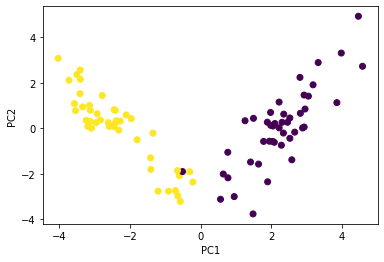

In [57]:
pca = PCA(n_components=2, random_state=2023)
norm_agg_X_pca = pca.fit_transform(X_norm)

plt.scatter(sc_agg_X_pca[:, 0], sc_agg_X_pca[:, 1], c=norm_agg_pred)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# 3. AffinityPropagation

In [58]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Affinity Propagation 모델 생성
af = AffinityPropagation(damping=0.5, preference=-300, random_state=2023)
sc_af_pred = af.fit_predict(X_sc)

# 클러스터링 결과 평가
sc_af_ss = np.round(metrics.silhouette_score(X_sc, sc_af_pred), 2)
print("Silhouette 계수: ", sc_af_ss)

sc_af_vm = np.round(metrics.v_measure_score(y, sc_af_pred), 2)
print('V-measure: ', sc_af_vm)

sc_af_ari_score = np.round(adjusted_rand_score(y, sc_af_pred),2)
print("Ari :", sc_af_ari_score)

sc_af_completeness_score = np.round(completeness_score(y, sc_af_pred),2)
print("Completeness:", sc_af_completeness_score)

Silhouette 계수:  0.27
V-measure:  0.79
Ari : 0.87
Completeness: 0.79


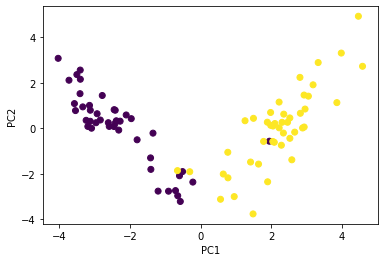

In [59]:
pca = PCA(n_components=2, random_state=2023)
sc_af_X_pca = pca.fit_transform(X_sc)

plt.scatter(sc_af_X_pca[:, 0], sc_af_X_pca[:, 1], c=sc_af_pred)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [60]:
# Affinity Propagation 모델 생성
af = AffinityPropagation(damping=0.5, preference=-12, random_state=2023)
norm_af_pred = af.fit_predict(X_norm)

# 클러스터링 결과 평가
norm_af_ss = np.round(metrics.silhouette_score(X_norm, norm_af_pred), 2)
print("Silhouette 계수: ", norm_af_ss)

norm_af_vm = np.round(metrics.v_measure_score(y, norm_af_pred), 2)
print('V-measure: ', norm_af_vm)

norm_af_ari_score = np.round(adjusted_rand_score(y, norm_af_pred),2)
print("Ari :", norm_af_ari_score)

norm_af_completeness_score = np.round(completeness_score(y, norm_af_pred),2)
print("Completeness:", norm_af_completeness_score)

Silhouette 계수:  0.56
V-measure:  0.92
Ari : 0.95
Completeness: 0.92


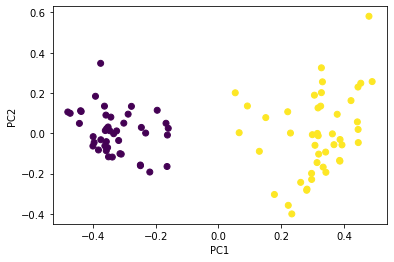

In [61]:
pca = PCA(n_components=2, random_state=2023)
norm_af_X_pca = pca.fit_transform(X_norm)

plt.scatter(norm_af_X_pca[:, 0], norm_af_X_pca[:, 1], c=norm_af_pred)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [62]:
# Affinity Propagation 모델 생성
af = AffinityPropagation(damping=0.5, preference=-300)
rbs_af_pred = af.fit_predict(X_rbs)

# 클러스터링 결과 평가
rbs_af_ss = np.round(metrics.silhouette_score(X_rbs, rbs_af_pred), 2)
print("Silhouette 계수: ", rbs_af_ss)

rbs_af_vm = np.round(metrics.v_measure_score(y, rbs_af_pred), 2)
print('V-measure: ', rbs_af_vm)

rbs_af_ari_score = np.round(adjusted_rand_score(y, rbs_af_pred),2)
print("Ari :", rbs_af_ari_score)

rbs_af_completeness_score = np.round(completeness_score(y, rbs_af_pred),2)
print("Completeness:", rbs_af_completeness_score)

Silhouette 계수:  0.22
V-measure:  0.69
Ari : 0.78
Completeness: 0.69


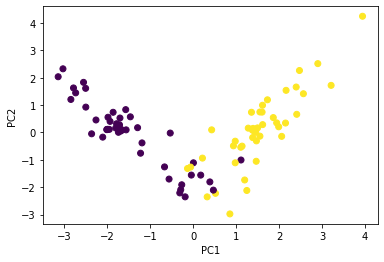

In [63]:
pca = PCA(n_components=2, random_state=2023)
rbs_af_X_pca = pca.fit_transform(X_rbs)

plt.scatter(rbs_af_X_pca[:, 0], rbs_af_X_pca[:, 1], c=rbs_af_pred)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()